<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#Epidish-vs-IHC" data-toc-modified-id="Epidish-vs-IHC-5">Epidish vs IHC</a></span><ul class="toc-item"><li><span><a href="#Ridge-plots" data-toc-modified-id="Ridge-plots-5.1">Ridge plots</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(gridExtra)
library(grid)

# Functions

In [3]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/plotting_functions.R")


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [5]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [6]:
table(metadata_IC$immune_cluster)


Pediatric inflamed     Myeloid-driven     Pediatric cold    Immune excluded 
                90                279                393                163 

In [7]:
load( file = paste0(datapath, "TME_clusters/geneset_cc_norm.RData"))

# Epidish vs IHC

In [8]:
methyl_IHC <- xlsx::read.xlsx(file = paste0(datapath, "IHC/11032021_ImmPedCan_MB_ICGC_Burdenko_IHC.xlsx"), sheetIndex = 1)

In [9]:
outliers::grubbs.test(as.numeric(methyl_IHC$Bcell), type = 10)


	Grubbs test for one outlier

data:  as.numeric(methyl_IHC$Bcell)
G = 3.76139, U = 0.69911, p-value = 0.001101
alternative hypothesis: highest value 0.107315601852905 is an outlier


In [22]:
methyl_IHC$Methyl_CD8_z <- scale(as.numeric(methyl_IHC$Bcell))

methyl_IHC$CD8_z <- scale(methyl_IHC$T.cells.CD8)

In [14]:
methyl_IHC$T.cells.CD8 <- as.numeric(methyl_IHC$T.cells.CD8)

Warning message:
“Removed 19 rows containing missing values (geom_point).”


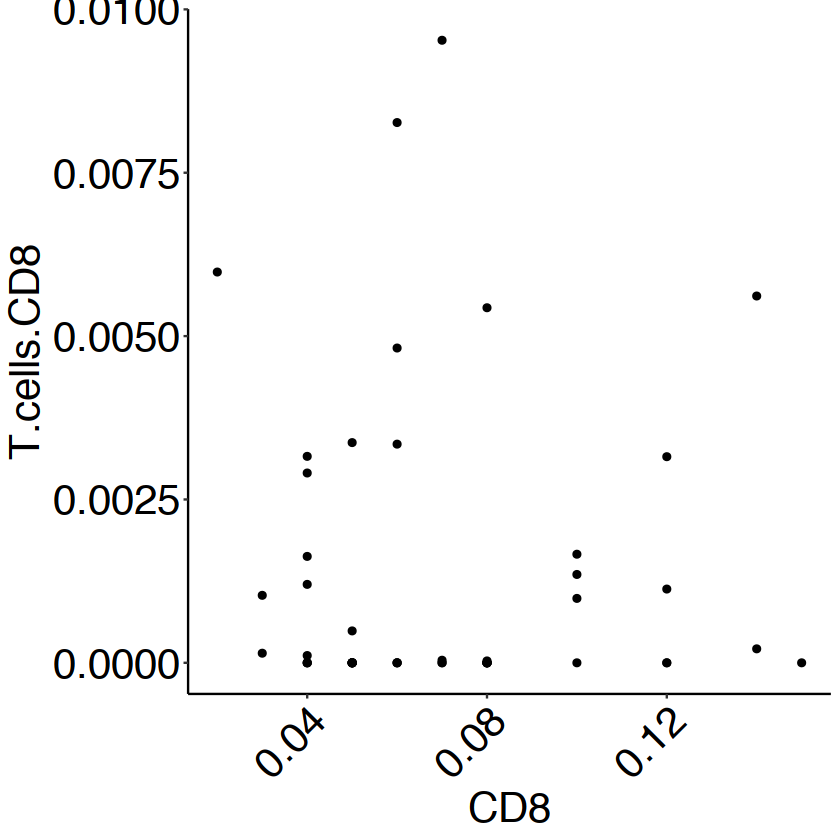

In [15]:
ggplot(data = methyl_IHC, aes(x = CD8, y = T.cells.CD8)) + 
geom_point() + myplot + myaxis

In [8]:
icgc <- metadata_IC[metadata_IC$group == "ICGC",]

In [9]:
newcastle <- read.csv(paste0(datapath, "methyl_epidish/ICGC_epidish_Newcastle_signatures.csv"),
                             header = TRUE, check.names = F,
                             stringsAsFactors = FALSE)

In [10]:
colnames(newcastle)[1] <- "sample_id"

In [11]:
icgc_IC_methyl <- merge(icgc, newcastle, by = "sample_id")

In [12]:
dim(icgc_IC_methyl)

[1] 195  37

In [13]:
icgc_IC_methyl$T_cells <- icgc_IC_methyl$CD4_Eff + icgc_IC_methyl$CD8T + icgc_IC_methyl$Treg

icgc_IC_methyl$Granulocytes <- icgc_IC_methyl$Neu + icgc_IC_methyl$Eos

In [14]:
pairwise.t.test(icgc_IC_methyl$T_cells, icgc_IC_methyl$immune_cluster, 
                p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_IC_methyl$T_cells and icgc_IC_methyl$immune_cluster 

                Pediatric inflamed Myeloid-driven       Pediatric cold
Myeloid-driven  0.00012            -                    -             
Pediatric cold  0.00000000000027   < 0.0000000000000002 -             
Immune excluded 0.00000000007031   0.00000046963596     1.00000       

P value adjustment method: bonferroni 

In [15]:
pairwise.t.test(icgc_IC_methyl$Bcell, icgc_IC_methyl$immune_cluster, 
                p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_IC_methyl$Bcell and icgc_IC_methyl$immune_cluster 

                Pediatric inflamed Myeloid-driven       Pediatric cold
Myeloid-driven  0.092              -                    -             
Pediatric cold  1.000              < 0.0000000000000002 -             
Immune excluded 0.495              0.000000032          1.000         

P value adjustment method: bonferroni 

In [16]:
pairwise.t.test(icgc_IC_methyl$NK, icgc_IC_methyl$immune_cluster, 
                p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_IC_methyl$NK and icgc_IC_methyl$immune_cluster 

                Pediatric inflamed Myeloid-driven       Pediatric cold
Myeloid-driven  1.00000            -                    -             
Pediatric cold  0.00038            < 0.0000000000000002 -             
Immune excluded 0.00086            0.00000033           1.00000       

P value adjustment method: bonferroni 

In [17]:
pairwise.t.test(icgc_IC_methyl$Mono, icgc_IC_methyl$immune_cluster, 
                p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_IC_methyl$Mono and icgc_IC_methyl$immune_cluster 

                Pediatric inflamed  Myeloid-driven       Pediatric cold
Myeloid-driven  1                   -                    -             
Pediatric cold  0.00000017541147145 < 0.0000000000000002 -             
Immune excluded 0.00000406923358355 0.00000000000000039  1             

P value adjustment method: bonferroni 

In [18]:
pairwise.t.test(icgc_IC_methyl$Granulocytes, icgc_IC_methyl$immune_cluster, 
                p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_IC_methyl$Granulocytes and icgc_IC_methyl$immune_cluster 

                Pediatric inflamed Myeloid-driven       Pediatric cold
Myeloid-driven  1.00000            -                    -             
Pediatric cold  0.04983            < 0.0000000000000002 -             
Immune excluded 0.39142            0.00057              1.00000       

P value adjustment method: bonferroni 

## Ridge plots

In [19]:
#scale for visualization
icgc_IC_methyl$T_cells_z <- scale(icgc_IC_methyl$T_cells)
icgc_IC_methyl$NK_z <- scale(icgc_IC_methyl$NK)
icgc_IC_methyl$B_cell_z <- scale(icgc_IC_methyl$Bcell)
icgc_IC_methyl$Granulocytes_z <- scale(icgc_IC_methyl$Granulocytes)
icgc_IC_methyl$Mono_z <- scale(icgc_IC_methyl$Mono)

In [20]:
ridgeplot_tcells <- plot_ridge.fx(icgc_IC_methyl, "T_cells_z")  

ridgeplot_NKcells <- plot_ridge.fx(icgc_IC_methyl, "NK_z")  

ridgeplot_bcells <- plot_ridge.fx(icgc_IC_methyl, "B_cell_z")  

ridgeplot_mono <- plot_ridge.fx(icgc_IC_methyl, "Mono_z")

In [21]:
label.df <- data.frame(x = c(4,4,4), y = c(2.3,3.3,4.3))

ridgeplot_tcells <- ridgeplot_tcells + ggtitle(expression(~underline("T-cell estimation"))) +
labs(x = "z score immune cell-type") +
geom_text(data = label.df,aes(x = x, y = y), label = "***", size = 15) +
scale_x_continuous(expand = c(0.2,0))

Picking joint bandwidth of 0.283



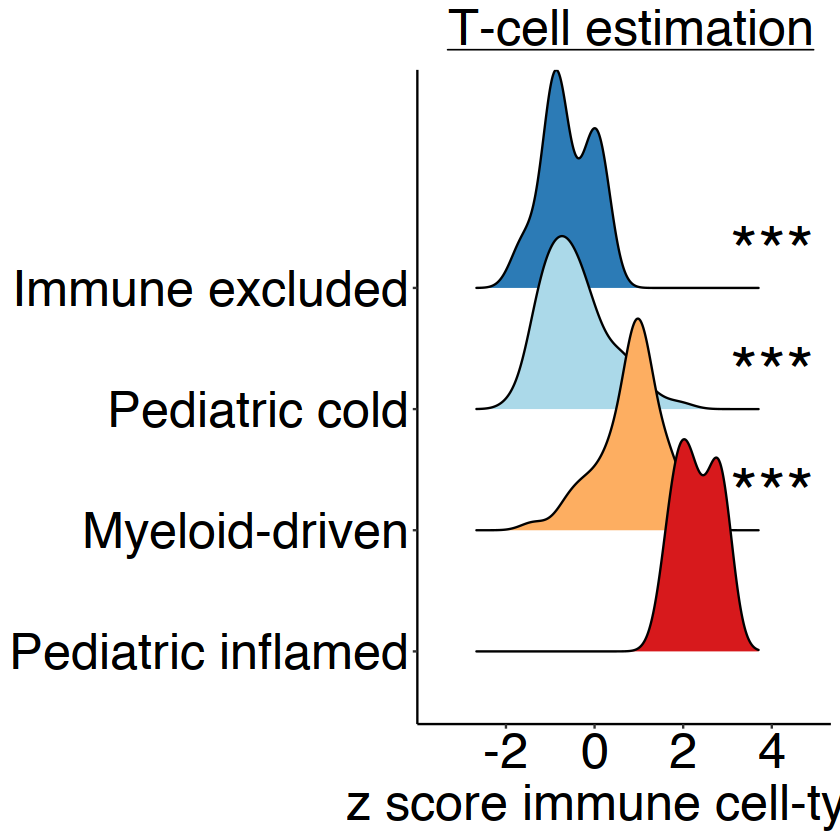

In [22]:
ridgeplot_tcells 

In [23]:
ridgeplot_bcells <- ridgeplot_bcells + ggtitle(expression(~underline("B-cell estimation"))) +
theme(axis.text.y = element_blank()) + labs(x = "z score immune cell-type") 

In [24]:
label.df <- data.frame(x = c(4,4), y = c(3.3,4.3))

ridgeplot_NKcells <- ridgeplot_NKcells + ggtitle(expression(~underline("NK-cell estimation")))  +
labs(x = "z score immune cell-type") +
geom_text(data = label.df,aes(x = x, y = y), label = "***", size = 15) +
scale_x_continuous(expand = c(0.2,0)) + theme(axis.text.y = element_blank())

In [25]:
label.df <- data.frame(x = c(4,4), y = c(3.3,4.3))

ridgeplot_mono <- ridgeplot_mono + ggtitle(expression(~underline("Monocyte estimation")))  +
labs(x = "z score immune cell-type") +
geom_text(data = label.df,aes(x = x, y = y), label = "***", size = 15) +
scale_x_continuous(expand = c(0.2,0)) + theme(axis.text.y = element_blank())

In [26]:
pdf(paste0(plotpath, "IPD_clusters_epidish_ridgeplot.pdf"),
   width = 20, height = 10,
   useDingbats = FALSE)

grid.arrange(ridgeplot_tcells + theme(axis.text.y = element_blank()),
             ridgeplot_bcells, 
             ridgeplot_NKcells,
             ridgeplot_mono ,
             nrow=1)

dev.off()

Picking joint bandwidth of 0.283

Picking joint bandwidth of 0.211

Picking joint bandwidth of 0.281

Picking joint bandwidth of 0.126



pdf 
  2

In [147]:
pdf(paste0(plotpath, "IPD_clusters_epidish_Tcell_ridgeplot.pdf"),
   width = 8, height = 10,
   useDingbats = FALSE)

ridgeplot_tcells

dev.off()

Picking joint bandwidth of 0.283



pdf 
  2